# VIA Rail Dataset - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on the VIA Rail aggregated dataset to understand train schedules, delays, and performance patterns.

## 1. Import Required Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the Dataset

In [15]:
# Load the aggregated VIA Rail data
df = pd.read_csv('/workspaces/via_rail/via_data_filtered.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Shape: 205,301 rows × 14 columns

First 5 rows:


,train_id,departed,arrived,from,to,instance,stop_id,station,code,estimated,scheduled,eta,diff,diffMin
0,20,True,True,MONTRÉAL,QUÉBEC,2025-04-01,0,Montréal,MTRL,2025-04-01T10:25:00Z,2025-04-01T10:25:00Z,ARR,goo,0.0
1,20,True,True,MONTRÉAL,QUÉBEC,2025-04-01,1,St. Lambert,SLAM,2025-04-01T10:54:14Z,2025-04-01T10:38:00Z,ARR,bad,16.0
2,20,True,True,MONTRÉAL,QUÉBEC,2025-04-01,2,St. Hyacinthe,SHYA,2025-04-01T11:20:54Z,2025-04-01T11:06:00Z,ARR,med,14.0
3,20,True,True,MONTRÉAL,QUÉBEC,2025-04-01,3,Drummondville,DRMV,2025-04-01T11:58:05Z,2025-04-01T11:43:00Z,ARR,bad,15.0
4,20,True,True,MONTRÉAL,QUÉBEC,2025-04-01,4,Ste-Foy,SFOY,2025-04-01T13:34:22Z,2025-04-01T13:25:00Z,ARR,med,9.0


## 3. Display Basic Dataset Information

In [16]:
# Display column names and data types
print("Column Information:")
print("="*60)
df.info()

print("\n" + "="*60)
print("Column Names:")
print(df.columns.tolist())

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205301 entries, 0 to 205300
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   train_id   205301 non-null  int64  
 1   departed   205301 non-null  bool   
 2   arrived    205301 non-null  bool   
 3   from       205301 non-null  object 
 4   to         205301 non-null  object 
 5   instance   205301 non-null  object 
 6   stop_id    205301 non-null  int64  
 7   station    205301 non-null  object 
 8   code       205298 non-null  object 
 9   estimated  205301 non-null  object 
 10  scheduled  205301 non-null  object 
 11  eta        205301 non-null  object 
 12  diff       203759 non-null  object 
 13  diffMin    203759 non-null  float64
dtypes: bool(2), float64(1), int64(2), object(9)
memory usage: 19.2+ MB

Column Names:
['train_id', 'departed', 'arrived', 'from', 'to', 'instance', 'stop_id', 'station', 'code', 'estimated', 'scheduled', 'eta', '

## 4. Check for Missing Values

Missing Values Summary:
         Missing Count  Percentage
diffMin           1542    0.751092
diff              1542    0.751092
code                 3    0.001461


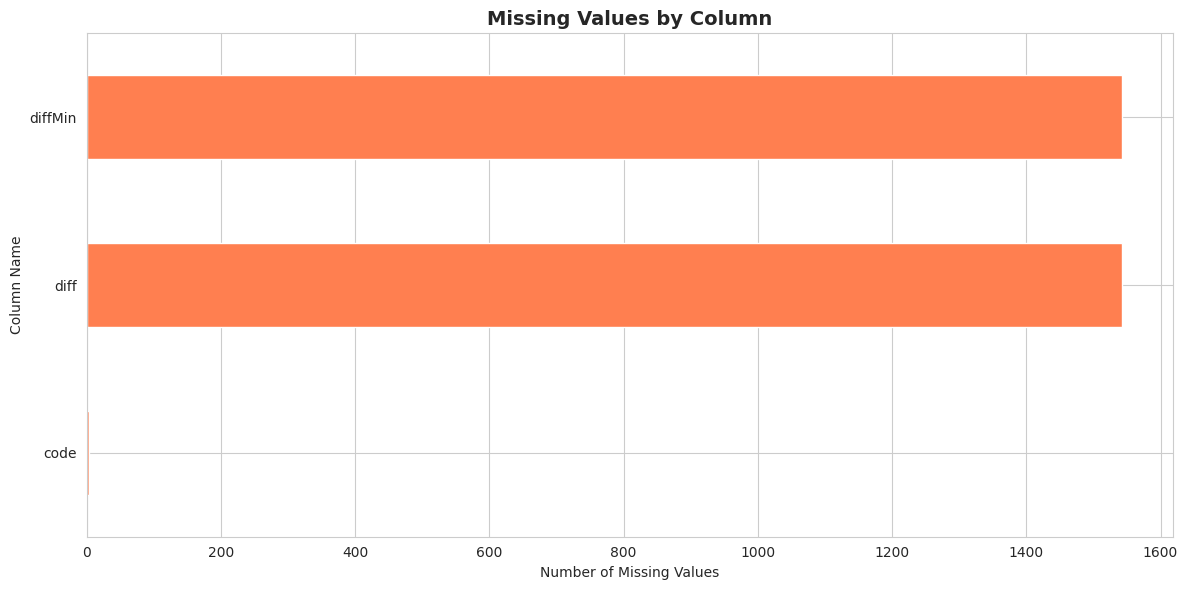

In [17]:
# Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Count', ascending=False)

print("Missing Values Summary:")
print("="*60)
print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing values
plt.figure(figsize=(12, 6))
missing_data = df.isnull().sum()[df.isnull().sum() > 0]
if len(missing_data) > 0:
    missing_data.sort_values(ascending=True).plot(kind='barh', color='coral')
    plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Missing Values')
    plt.ylabel('Column Name')
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ No missing values found in the dataset!")

## 5. Generate Statistical Summary

In [18]:
# Statistical summary of numerical columns
print("Statistical Summary:")
print("="*60)
df.describe()

Statistical Summary:


,train_id,stop_id,diffMin
count,205301.000000,205301.000000,203759.000000
mean,225.928013,10.183623,28.527874
std,270.656586,11.721256,63.674016
min,5.000000,0.000000,-479.000000
25%,39.000000,3.000000,0.000000
50%,68.000000,6.000000,12.000000
75%,601.000000,12.000000,33.000000
max,693.000000,60.000000,1120.000000


## 6. Explore Data Types and Unique Values

In [19]:
# Count unique values in each column
print("Unique Values per Column:")
print("="*60)
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col:20s}: {unique_count:,} unique values")

print("\n" + "="*60)
print(f"Total Trains: {df['train_id'].nunique():,}")
print(f"Total Stations: {df['station'].nunique():,}")
print(f"Date Range: {df['instance'].min()} to {df['instance'].max()}")

Unique Values per Column:
train_id            : 81 unique values
departed            : 2 unique values
arrived             : 2 unique values
from                : 26 unique values
to                  : 24 unique values
instance            : 278 unique values
stop_id             : 61 unique values
station             : 291 unique values
code                : 289 unique values
estimated           : 187,579 unique values
scheduled           : 135,154 unique values
eta                 : 1,067 unique values
diff                : 3 unique values
diffMin             : 739 unique values

Total Trains: 81
Total Stations: 291
Date Range: 2025-04-01 to 2026-01-03


## 7. Analyze Delay Patterns (diffMin)

Delay Statistics (diffMin):
count    203759.000000
mean         28.527874
std          63.674016
min        -479.000000
25%           0.000000
50%          12.000000
75%          33.000000
max        1120.000000
Name: diffMin, dtype: float64

On-Time Performance:
  On Time (0 min):  33,423 (16.28%)
  Early (<0 min):   17,648 (8.60%)
  Delayed (>0 min): 152,688 (74.37%)


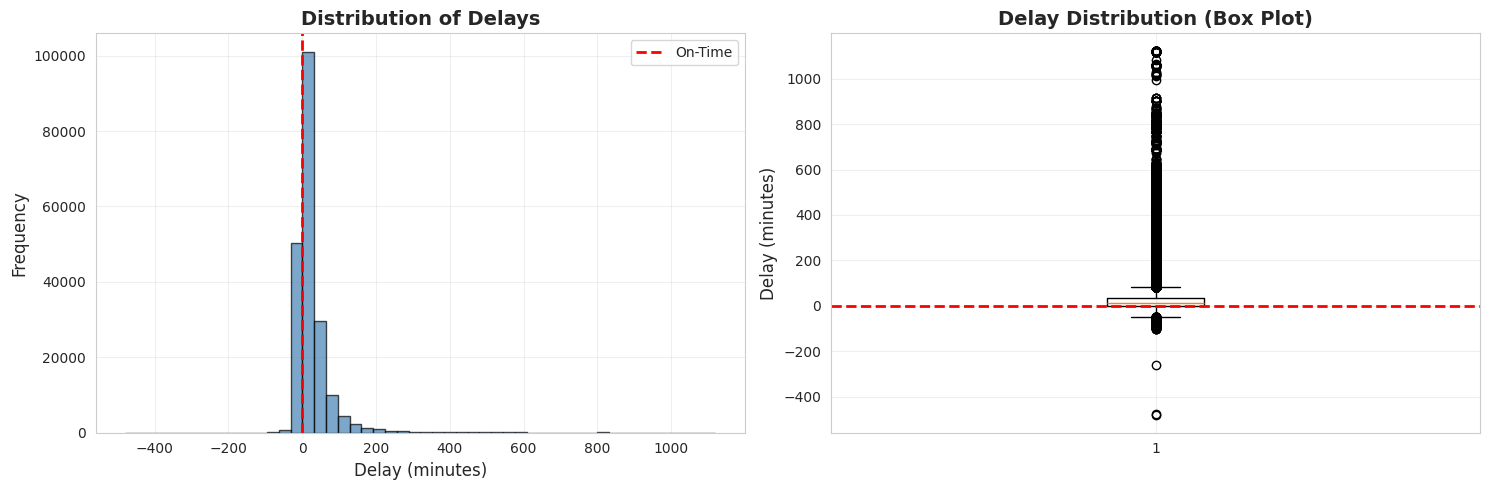

In [20]:
# Analyze delay distribution
print("Delay Statistics (diffMin):")
print("="*60)
print(df['diffMin'].describe())

# Calculate on-time performance
on_time = (df['diffMin'] == 0).sum()
early = (df['diffMin'] < 0).sum()
delayed = (df['diffMin'] > 0).sum()
total = len(df)

print(f"\nOn-Time Performance:")
print(f"  On Time (0 min):  {on_time:,} ({on_time/total*100:.2f}%)")
print(f"  Early (<0 min):   {early:,} ({early/total*100:.2f}%)")
print(f"  Delayed (>0 min): {delayed:,} ({delayed/total*100:.2f}%)")

# Visualize delay distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['diffMin'].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='On-Time')
axes[0].set_xlabel('Delay (minutes)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Delays', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['diffMin'].dropna(), vert=True)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='On-Time')
axes[1].set_ylabel('Delay (minutes)', fontsize=12)
axes[1].set_title('Delay Distribution (Box Plot)', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Analyze Train Routes

In [21]:
# Analyze most common routes
routes_df = df.groupby('train_id').agg({
    'from': 'first',
    'to': 'first',
    'train_id': 'count'
}).rename(columns={'train_id': 'observations'}).sort_values('observations', ascending=False)

print("Top 10 Most Frequent Train Routes:")
print("="*60)
print(routes_df.head(10))

# Most common origin-destination pairs
route_pairs = df.groupby(['from', 'to']).size().sort_values(ascending=False).head(10)
print("\nTop 10 Origin-Destination Pairs:")
print("="*60)
print(route_pairs)

Top 10 Most Frequent Train Routes:
                   from             to  observations
train_id                                            
693            WINNIPEG      CHURCHILL          7832
6         PRINCE RUPERT         JASPER          7018
603            MONTRÉAL     SENNETERRE          6525
692           CHURCHILL       WINNIPEG          6481
15              HALIFAX       MONTRÉAL          6475
5                JASPER  PRINCE RUPERT          6185
14             MONTRÉAL        HALIFAX          6066
601            MONTRÉAL      JONQUIÈRE          4927
604          SENNETERRE       MONTRÉAL          4642
185             SUDBURY    WHITE RIVER          3905

Top 10 Origin-Destination Pairs:
from           to       
OTTAWA         TORONTO      19108
TORONTO        OTTAWA       19036
               MONTRÉAL     13677
MONTRÉAL       TORONTO      12698
OTTAWA         QUÉBEC       12332
QUÉBEC         OTTAWA       11354
TORONTO        WINDSOR      10406
WINDSOR        TORONTO      1005

## 9. Station Analysis

Top 15 Busiest Stations:
station
Toronto          11207
Montréal          7396
Kingston          7355
Ottawa            7018
Oshawa            6652
Dorval            5904
Belleville        5743
Cobourg           4633
Fallowfield       4314
Brockville        4166
Guildwood         3923
Drummondville     3227
St. Lambert       3227
Ste-Foy           3226
London            3197
Name: count, dtype: int64


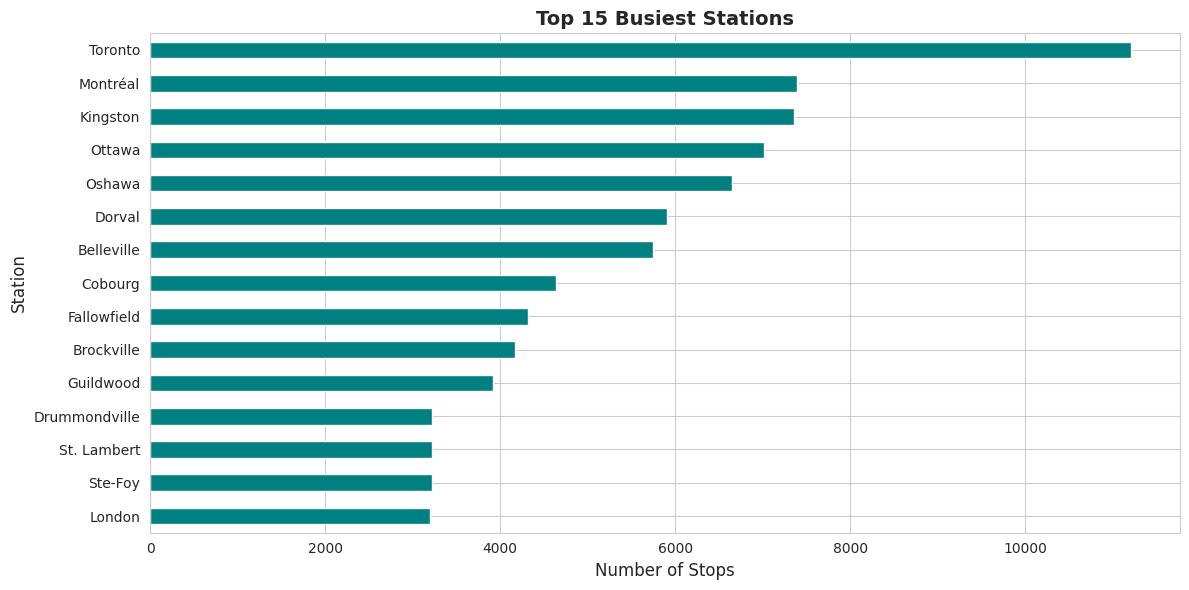


Top 10 Stations with Highest Average Delays:
                  mean  median  count
station                              
Thompson    143.324272   106.0    515
Reserve     102.485075    60.0    268
Sturgis     100.126866    58.0    268
Endeavour    99.182836    58.0    268
Mikado       92.294776    43.0    268
Hudson Bay   91.645522    49.0    268
Veregin      91.097015    41.5    268
Canora       90.940299    43.0    268
Togo         90.921642    45.5    268
Kamsack      90.604478    43.0    268


In [22]:
# Busiest stations
station_counts = df['station'].value_counts().head(15)

print("Top 15 Busiest Stations:")
print("="*60)
print(station_counts)

# Visualize busiest stations
plt.figure(figsize=(12, 6))
station_counts.plot(kind='barh', color='teal')
plt.xlabel('Number of Stops', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.title('Top 15 Busiest Stations', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Average delay by station (top 10 worst)
station_delays = df.groupby('station')['diffMin'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
station_delays = station_delays[station_delays['count'] >= 10]  # Filter stations with at least 10 observations

print("\nTop 10 Stations with Highest Average Delays:")
print("="*60)
print(station_delays.head(10))

## 10. Temporal Analysis

Daily Delay Statistics:
         date  mean_delay  median_delay  count
0  2025-04-01   14.134969           8.0    815
1  2025-04-02   14.333728           8.0    845
2  2025-04-03   13.483453          10.0    695
3  2025-04-04   10.236786           6.0    946
4  2025-04-05   16.884837           5.0    521
5  2025-04-06   28.323564          13.0    853
6  2025-04-07    9.627383           6.0    577
7  2025-04-08   10.616049           6.0    810
8  2025-04-09   15.870813           8.0    836
9  2025-04-10   18.813885          10.0    677


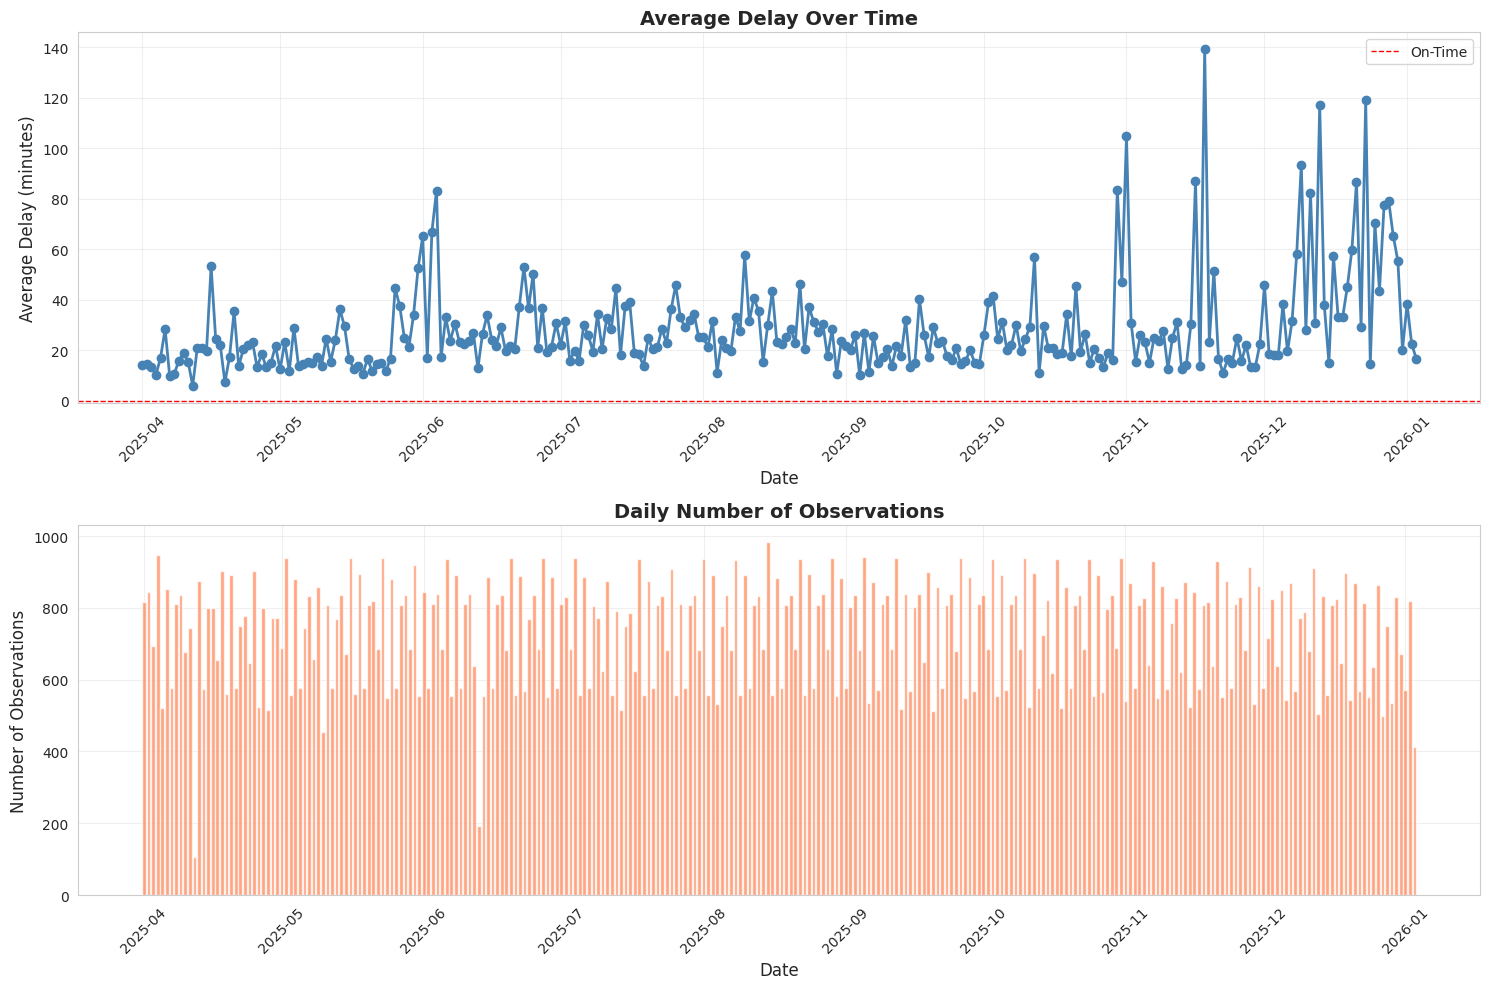

In [23]:
# Convert instance to datetime
df['date'] = pd.to_datetime(df['instance'])

# Daily delay trends
daily_delays = df.groupby(df['date'].dt.date).agg({
    'diffMin': ['mean', 'median', 'count']
}).reset_index()
daily_delays.columns = ['date', 'mean_delay', 'median_delay', 'count']

print("Daily Delay Statistics:")
print("="*60)
print(daily_delays.head(10))

# Visualize daily trends
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Average delay over time
axes[0].plot(daily_delays['date'], daily_delays['mean_delay'], marker='o', linestyle='-', color='steelblue', linewidth=2)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=1, label='On-Time')
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Average Delay (minutes)', fontsize=12)
axes[0].set_title('Average Delay Over Time', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Number of observations over time
axes[1].bar(daily_delays['date'], daily_delays['count'], color='coral', alpha=0.7)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Number of Observations', fontsize=12)
axes[1].set_title('Daily Number of Observations', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 11. Train Performance Analysis

Top 10 Trains with Highest Average Delays:
    train_id  mean_delay  median_delay   std_delay  count         from  \
80       693   91.556378          47.0  144.410272   7831     WINNIPEG   
77       690   73.527324          10.0  188.745605   3184    CHURCHILL   
79       692   66.647189           8.0  165.045962   6332    CHURCHILL   
2         14   61.173784          42.0   65.441802   6065     MONTRÉAL   
58       603   51.947977          33.0   67.588851   6401     MONTRÉAL   
53       185   49.687849          31.0   72.667000   3761      SUDBURY   
3         15   41.620978          27.0   52.461982   6464      HALIFAX   
54       186   40.005348          19.0   77.309223   3553  WHITE RIVER   
19        44   37.639928          32.0   36.215092   1658      TORONTO   
46        79   36.065162          26.0   34.041390   2747      TORONTO   

             to  
80    CHURCHILL  
77      THE PAS  
79     WINNIPEG  
2       HALIFAX  
58   SENNETERRE  
53  WHITE RIVER  
3      MONTRÉAL 

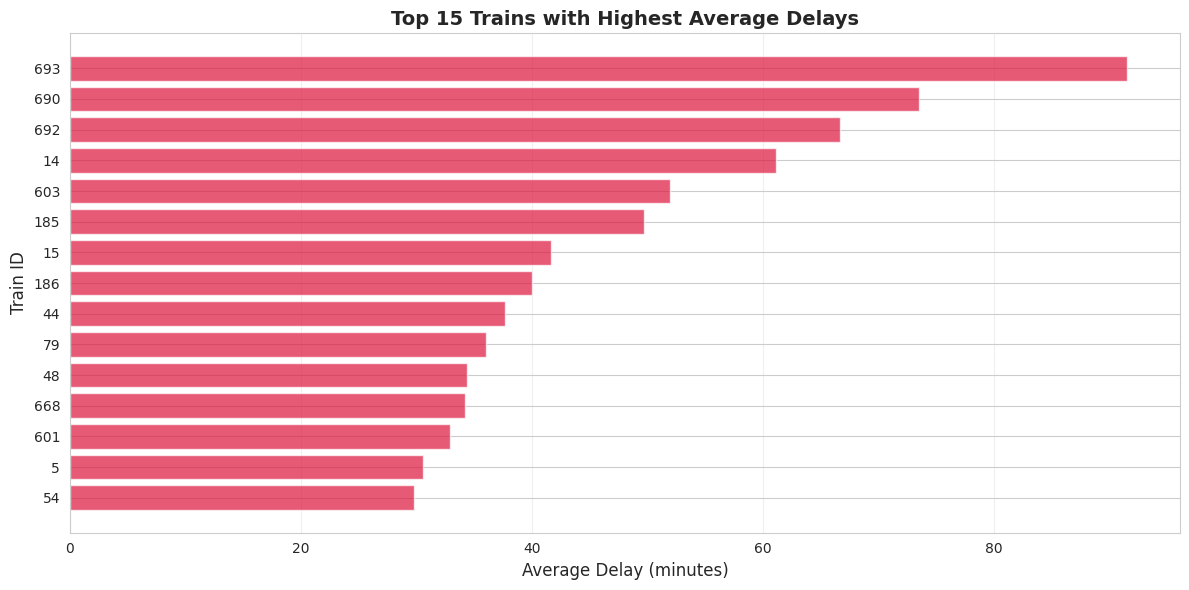

In [24]:
# Analyze performance by train
train_performance = df.groupby('train_id').agg({
    'diffMin': ['mean', 'median', 'std', 'count'],
    'from': 'first',
    'to': 'first'
}).reset_index()

train_performance.columns = ['train_id', 'mean_delay', 'median_delay', 'std_delay', 'count', 'from', 'to']
train_performance = train_performance[train_performance['count'] >= 10].sort_values('mean_delay', ascending=False)

print("Top 10 Trains with Highest Average Delays:")
print("="*60)
print(train_performance.head(10))

print("\nTop 10 Most Punctual Trains:")
print("="*60)
print(train_performance.tail(10))

# Visualize train performance
top_delayed = train_performance.head(15)
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_delayed)), top_delayed['mean_delay'], color='crimson', alpha=0.7)
plt.yticks(range(len(top_delayed)), top_delayed['train_id'])
plt.xlabel('Average Delay (minutes)', fontsize=12)
plt.ylabel('Train ID', fontsize=12)
plt.title('Top 15 Trains with Highest Average Delays', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 12. Correlation Analysis

Correlation Matrix:
          train_id   stop_id   diffMin
train_id  1.000000  0.472285  0.143086
stop_id   0.472285  1.000000  0.218931
diffMin   0.143086  0.218931  1.000000


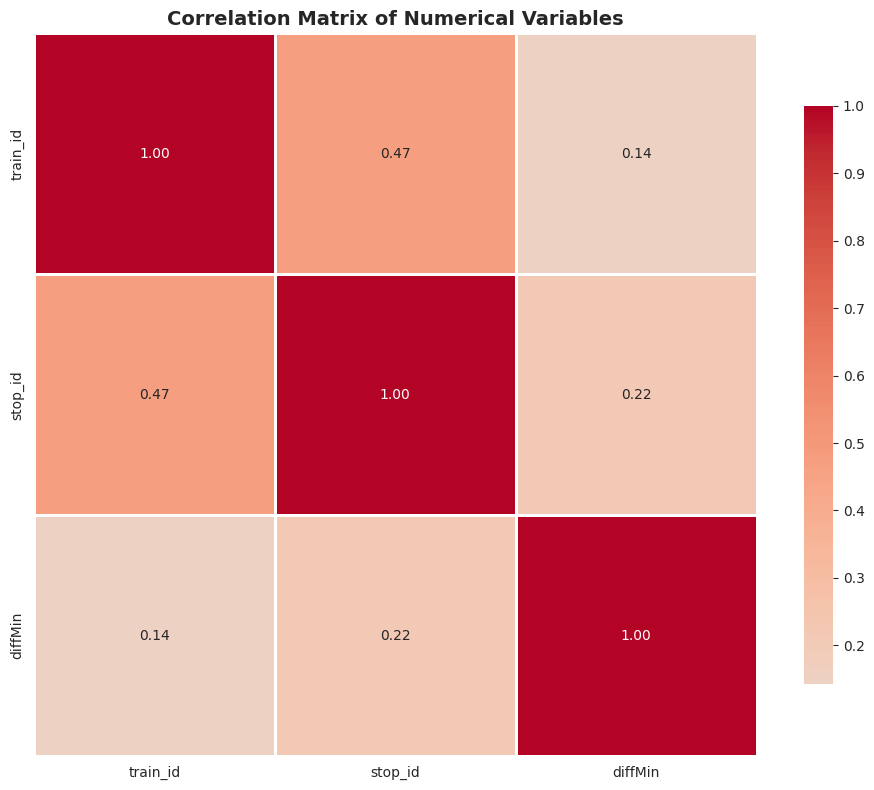

In [25]:
# Select numerical columns for correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_cols) > 1:
    # Calculate correlation matrix
    correlation_matrix = df[numerical_cols].corr()
    
    print("Correlation Matrix:")
    print("="*60)
    print(correlation_matrix)
    
    # Visualize correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
    plt.title('Correlation Matrix of Numerical Variables', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numerical columns for correlation analysis.")

## 13. Summary and Key Insights

This section summarizes the key findings from the exploratory data analysis.

In [26]:
print("="*60)
print("KEY INSIGHTS SUMMARY")
print("="*60)

print(f"\n📊 Dataset Overview:")
print(f"  • Total Observations: {len(df):,}")
print(f"  • Unique Trains: {df['train_id'].nunique():,}")
print(f"  • Unique Stations: {df['station'].nunique():,}")
print(f"  • Date Range: {df['instance'].min()} to {df['instance'].max()}")

print(f"\n⏰ Delay Performance:")
on_time_pct = (df['diffMin'] == 0).sum() / len(df) * 100
early_pct = (df['diffMin'] < 0).sum() / len(df) * 100
delayed_pct = (df['diffMin'] > 0).sum() / len(df) * 100
print(f"  • On-Time Rate: {on_time_pct:.2f}%")
print(f"  • Early Rate: {early_pct:.2f}%")
print(f"  • Delayed Rate: {delayed_pct:.2f}%")
print(f"  • Average Delay: {df['diffMin'].mean():.2f} minutes")
print(f"  • Median Delay: {df['diffMin'].median():.2f} minutes")
print(f"  • Max Delay: {df['diffMin'].max():.2f} minutes")
print(f"  • Max Early: {df['diffMin'].min():.2f} minutes")

print(f"\n🚂 Most Common Route:")
top_route = routes_df.head(1)
if len(top_route) > 0:
    print(f"  • Train: {top_route.index[0]}")
    print(f"  • From: {top_route['from'].iloc[0]} → To: {top_route['to'].iloc[0]}")
    print(f"  • Observations: {top_route['observations'].iloc[0]:,}")

print(f"\n🏢 Busiest Station:")
busiest = station_counts.head(1)
if len(busiest) > 0:
    print(f"  • Station: {busiest.index[0]}")
    print(f"  • Stops: {busiest.iloc[0]:,}")

print("\n" + "="*60)

KEY INSIGHTS SUMMARY

📊 Dataset Overview:
  • Total Observations: 205,301
  • Unique Trains: 81
  • Unique Stations: 291
  • Date Range: 2025-04-01 to 2026-01-03

⏰ Delay Performance:
  • On-Time Rate: 16.28%
  • Early Rate: 8.60%
  • Delayed Rate: 74.37%
  • Average Delay: 28.53 minutes
  • Median Delay: 12.00 minutes
  • Max Delay: 1120.00 minutes
  • Max Early: -479.00 minutes

🚂 Most Common Route:
  • Train: 693
  • From: WINNIPEG → To: CHURCHILL
  • Observations: 7,832

🏢 Busiest Station:
  • Station: Toronto
  • Stops: 11,207

